<a href="https://colab.research.google.com/github/dqminhv/Capstone_Project_2/blob/Fake_Job_Postings/Fake_Job_Postings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. **Data Preprocessing:**
   - Remove any irrelevant or redundant columns that do not contribute to the classification task.
   - Handle missing values, either by imputing them or removing rows/columns with missing data.
   - Convert textual data (job descriptions, requirements, etc.) into numerical representations (e.g., using word embeddings or TF-IDF).
   - Split the data into training and testing sets.

2. **Feature Engineering:**
   - Extract relevant features from the text data that may help the model distinguish between fake and real job postings.
   - Consider features such as word frequencies, sentence lengths, or any other domain-specific features that might be informative.

3. **Selecting a Model:**
   - Choose an appropriate machine learning algorithm for binary classification, such as Logistic Regression, Random Forest, Gradient Boosting, or Support Vector Machine (SVM).
   - Experiment with different algorithms to see which one performs best on your dataset.

4. **Training the Model:**
   - Train the selected model on the training dataset.
   - Use techniques like cross-validation to tune hyperparameters and avoid overfitting.

5. **Model Evaluation:**
   - Evaluate the model's performance on the testing dataset using metrics like accuracy, precision, recall, F1 score, and confusion matrix.
   - Consider the business requirements and implications of false positives and false negatives to choose the appropriate evaluation metric.

6. **Handling Class Imbalance (if present):**
   - Check if there is a significant class imbalance (i.e., a lot more real job postings than fake ones or vice versa).
   - If there is a class imbalance, consider techniques like oversampling, undersampling, or using synthetic data to balance the classes.

7. **Model Fine-Tuning:**
   - Depending on the results of the initial evaluation, make adjustments to the model or try different feature engineering approaches to improve performance.

8. **Model Deployment:**
   - Once you have a satisfactory model, deploy it in a production environment to make predictions on new job postings.

9. **Monitoring and Maintenance:**
   - Continuously monitor the model's performance in the production environment and retrain the model periodically on new data to ensure it stays up-to-date and accurate.

In [15]:
#import required packages
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus
import missingno as msno


**1. Load Data**

In [2]:
#Load csv file to a pandas DataFrame
job_postings_data = pd.read_csv('https://raw.githubusercontent.com/dqminhv/Capstone_Project_2/Fake_Job_Postings/Data/fake_job_postings.csv')

In [3]:
job_postings_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
job_postings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

<Axes: >

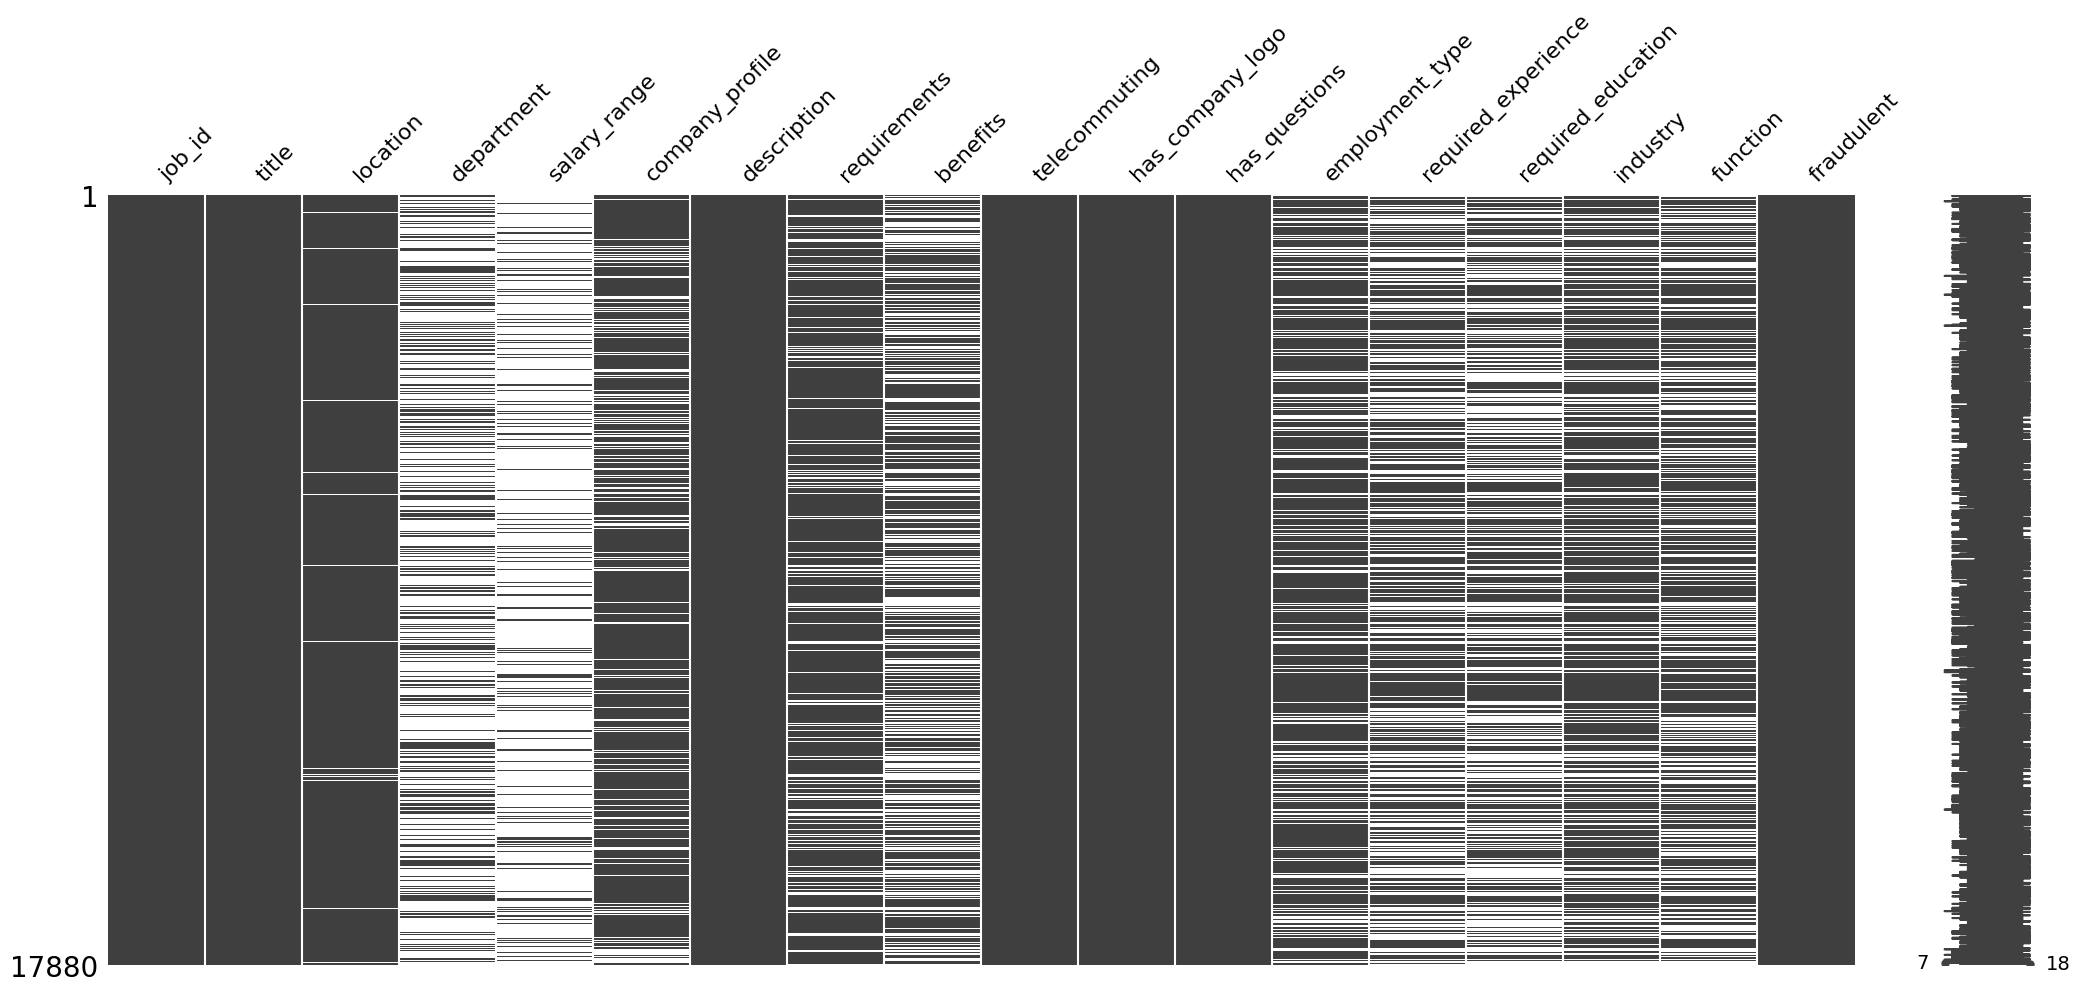

In [16]:
msno.matrix(job_postings_data)

In [ ]:
job_postings_data_NoLocation

In [10]:
job_postings_data_US = job_postings_data[job_postings_data['location'].str.startswith('US')]

ValueError: ignored